In [1]:
import math
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.linalg import eigh
from scipy.sparse import identity, csr_matrix, kron, save_npz, load_npz

# matplotlib parameters 
large = 40; med = 20; small = 20
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med ,
          'axes.titlesize': med ,
          'xtick.labelsize': med ,
          'ytick.labelsize': med ,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.serif"] = ["Helvetica Neue"]          
#plt.rcParams['text.usetex'] = True # need LaTeX. Change it to False if LaTeX is not installed in the system
plt.rcParams.update(params)

# Hamiltonian generation

In [2]:
# Imports the KLocalHamiltonian class from the local folder
from k_local_hamiltonian import KLocalHamiltonian

# Define the system size (number of sites in the system)
L = 7
# Define the locality (number of sites involved in each interaction)
k = 2

# Calculate the number of nearest-neighbor interactions (adjacent interactions)
adjacent_number = (L - k + 1) * 3 ** k
# Calculate the number of all possible non-adjacent interactions
nonadjacent_number = math.comb(L, k) * 3 ** k

# Define the mean of the random coefficients
mu = 0.0
# Define the standard deviation of the random coefficients
sigma_strength = 1.0

# Generate random coefficients for the interactions using a normal distribution
# Uncomment the following lines to set a fixed random seed for reproducibility
# random_seed = 1000
# np.random.seed(random_seed)
random_coefficients = np.random.normal(mu, sigma_strength, nonadjacent_number)

# Initialize the Hamiltonian generator with the specified parameters
# L: system size, k: locality, random_coefficients: coefficients
# adjacent=False indicates that non-adjacent interactions are considered
hamiltonian_generator = KLocalHamiltonian(L=L, k=k, random_coefficients=random_coefficients, adjacent=False)

In [4]:
# Generates the Pauli strings for the Hamiltonian
hamiltonian_generator.generate_k_local_pauli_strings()

['XXIIIII',
 'XYIIIII',
 'XZIIIII',
 'YXIIIII',
 'YYIIIII',
 'YZIIIII',
 'ZXIIIII',
 'ZYIIIII',
 'ZZIIIII',
 'XIXIIII',
 'XIYIIII',
 'XIZIIII',
 'YIXIIII',
 'YIYIIII',
 'YIZIIII',
 'ZIXIIII',
 'ZIYIIII',
 'ZIZIIII',
 'XIIXIII',
 'XIIYIII',
 'XIIZIII',
 'YIIXIII',
 'YIIYIII',
 'YIIZIII',
 'ZIIXIII',
 'ZIIYIII',
 'ZIIZIII',
 'XIIIXII',
 'XIIIYII',
 'XIIIZII',
 'YIIIXII',
 'YIIIYII',
 'YIIIZII',
 'ZIIIXII',
 'ZIIIYII',
 'ZIIIZII',
 'XIIIIXI',
 'XIIIIYI',
 'XIIIIZI',
 'YIIIIXI',
 'YIIIIYI',
 'YIIIIZI',
 'ZIIIIXI',
 'ZIIIIYI',
 'ZIIIIZI',
 'XIIIIIX',
 'XIIIIIY',
 'XIIIIIZ',
 'YIIIIIX',
 'YIIIIIY',
 'YIIIIIZ',
 'ZIIIIIX',
 'ZIIIIIY',
 'ZIIIIIZ',
 'IXXIIII',
 'IXYIIII',
 'IXZIIII',
 'IYXIIII',
 'IYYIIII',
 'IYZIIII',
 'IZXIIII',
 'IZYIIII',
 'IZZIIII',
 'IXIXIII',
 'IXIYIII',
 'IXIZIII',
 'IYIXIII',
 'IYIYIII',
 'IYIZIII',
 'IZIXIII',
 'IZIYIII',
 'IZIZIII',
 'IXIIXII',
 'IXIIYII',
 'IXIIZII',
 'IYIIXII',
 'IYIIYII',
 'IYIIZII',
 'IZIIXII',
 'IZIIYII',
 'IZIIZII',
 'IXIIIXI',
 'IXIIIYI',
 'IX

## Heatmap of the Hamiltonian matrix

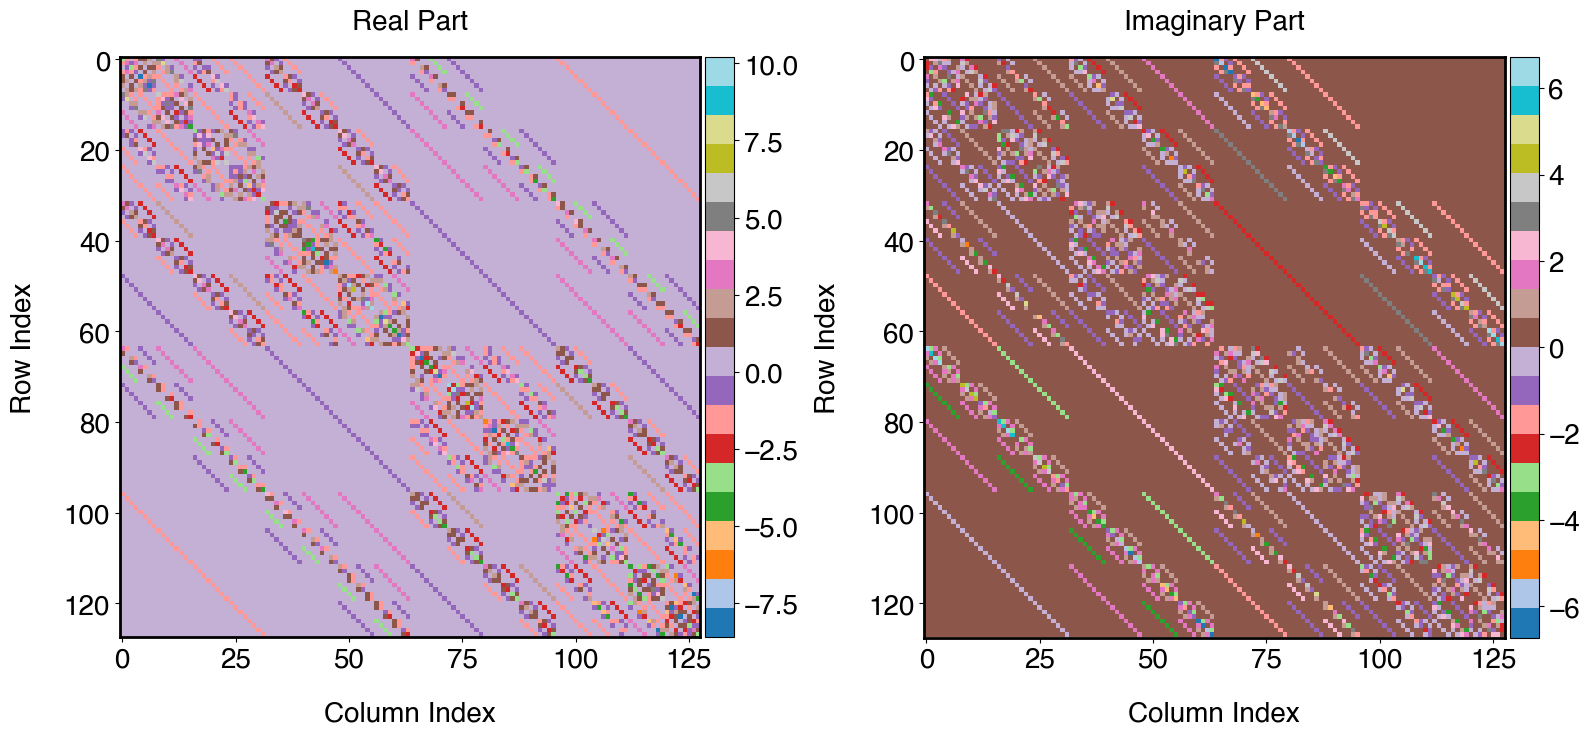

In [5]:
# Get the dense Hamiltonian matrix
H = hamiltonian_generator.hamiltonian_matrix().toarray()
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
colormap = "tab20"
# Plot real part
im1 = ax1.imshow(np.real(H), cmap=colormap, aspect='equal')
ax1.set_title('Real Part', pad=20)
ax1.set_xlabel('Column Index', labelpad=20)
ax1.set_ylabel('Row Index', labelpad=20)
# Add colorbar for real part
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
# Plot imaginary part
im2 = ax2.imshow(np.imag(H), cmap=colormap, aspect='equal')
ax2.set_title('Imaginary Part', pad=20)
ax2.set_xlabel('Column Index', labelpad=20)
ax2.set_ylabel('Row Index', labelpad=20)
# Add colorbar for imaginary part
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
# Style spines and ticks thickness
for ax in [ax1, ax2]:
     ax.spines['top'].set_linewidth(2)
     ax.spines['right'].set_linewidth(2)
     ax.spines['left'].set_linewidth(2)
     ax.spines['bottom'].set_linewidth(2)
plt.tight_layout()
plt.show()

# Energy level statistics

In [6]:
def calculate_level_statistics_definition_one(eigenvalues):

    # Sort eigenvalues in ascending order
    eigenvalues = np.sort(eigenvalues)
    """
    Compute the standard adjacent level spacing ratios r_n.

    Parameters:
        eigenvalues (numpy.ndarray): Sorted array of eigenvalues.
    
    Returns:
        numpy.ndarray: Array of level spacing ratios.
    """
    # Compute consecutive level spacings
    delta_E = np.diff(eigenvalues)  # ΔE_n = E_n - E_{n-1}
    
    # Compute standard adjacent gap ratio r_n
    r_n = np.minimum(delta_E[:-1], delta_E[1:]) / np.maximum(delta_E[:-1], delta_E[1:])
    
    return r_n

def calculate_level_statistics_definition_two(eigenvalues):
    """
    Compute an alternative level statistics metric (r-tilde).

    Parameters:
        eigenvalues (numpy.ndarray): Sorted array of eigenvalues.

    Returns:
        numpy.ndarray: An array of ratio values (r-tilde).
    """

    # Sort eigenvalues in ascending order
    eigenvalues = np.sort(eigenvalues)

    # Compute level spacings
    spacings = np.diff(eigenvalues)
    
    # Compute ratios: r_n = s_n / s_{n-1}
    r_n = spacings[1:] / spacings[:-1]
    
    # Compute min(r_n, 1/r_n) for a symmetric measure
    r_tilde = np.minimum(r_n, 1 / r_n)
    
    return r_tilde

In [7]:
print('Mean energy level statistics = ', np.mean(calculate_level_statistics_definition_one(eigh(H, eigvals_only=True))))

Mean energy level statistics =  1.6230203364835565e-14
